[*********************100%***********************]  1 of 1 completed
Sharpe Ratio for NDAQ: 0.13
Sortino Ratio for NDAQ: 0.15
Volatility for NDAQ: 0.01


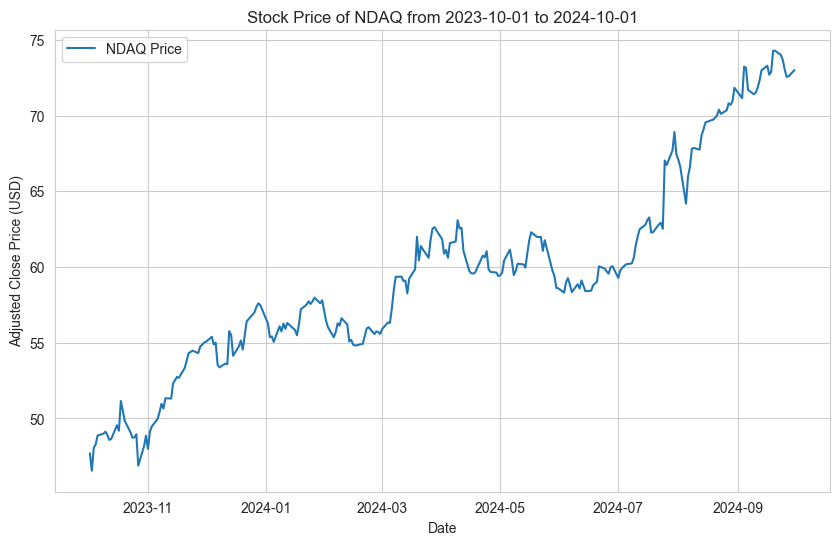

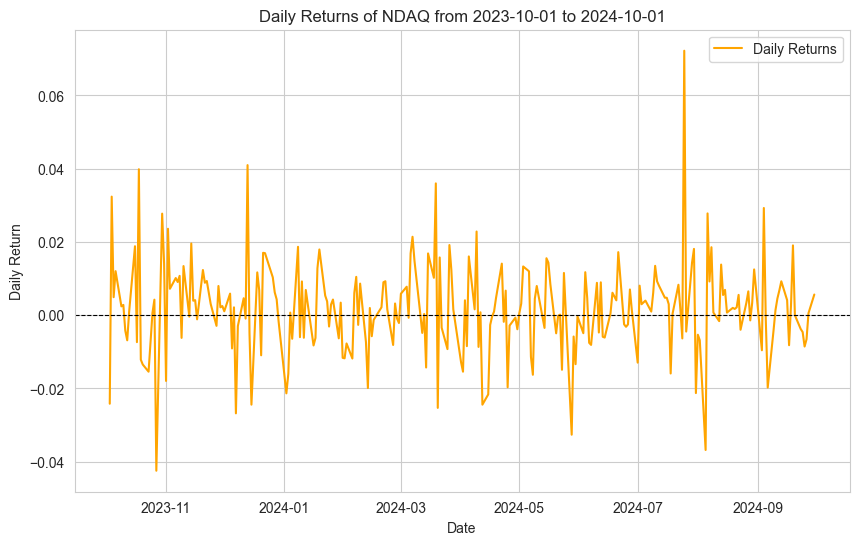

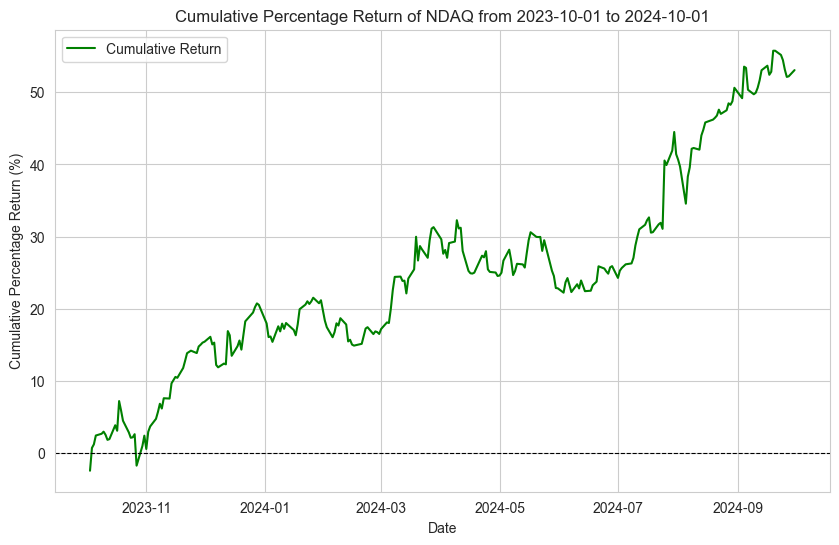

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class StockMetrics:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        
        # Download stock price data
        self.price_data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        
        # Calculate daily returns (percentage change)
        self.returns = self.price_data.pct_change().dropna()  # Remove NaN values for first day
        
        # Calculate Sharpe ratio (Assume RFR is 3% P.A.)
        self.sharpe = (self.returns.mean() - (0.03/250)) / self.returns.std()
        
        # Calculate volatility
        self.volatility = self.returns.std()

        # Calculate Sortino ratio
        self.sortino = self.calculate_sortino(target_return=0.03)  # Assuming a target return of 3%
    
    # Method to calculate Sortino Ratio
    def calculate_sortino(self, target_return):
        # Calculate downside deviations
        downside_returns = self.returns[self.returns < target_return]
        downside_deviation = np.sqrt((downside_returns**2).mean())
        
        # Calculate Sortino Ratio
        mean_return = self.returns.mean()
        sortino_ratio = (mean_return - target_return/250) / downside_deviation if downside_deviation != 0 else np.nan
        return sortino_ratio

    # Method to output the metrics (Sharpe ratio, Sortino ratio, and volatility)
    def print_metrics(self):
        print(f"Sharpe Ratio for {self.ticker}: {self.sharpe:.2f}")
        print(f"Sortino Ratio for {self.ticker}: {self.sortino:.2f}")
        print(f"Volatility for {self.ticker}: {self.volatility:.2f}")
    
    # Method to plot stock prices over time
    def plot_price(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.price_data.index, self.price_data, label=f'{self.ticker} Price')
        plt.title(f'Stock Price of {self.ticker} from {self.start_date} to {self.end_date}')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price (USD)')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    # Method to plot daily returns over time
    def plot_returns(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.returns.index, self.returns, label='Daily Returns', color='orange')
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at zero
        plt.title(f'Daily Returns of {self.ticker} from {self.start_date} to {self.end_date}')
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.grid(True)
        plt.legend()
        plt.show()

    # Method to plot cumulative percentage return
    def plot_cumulative_return(self):
        # Calculate cumulative returns
        cumulative_returns = (1 + self.returns).cumprod() - 1
        cumulative_returns_percentage = cumulative_returns * 100  # Convert to percentage

        plt.figure(figsize=(10, 6))
        plt.plot(cumulative_returns_percentage.index, cumulative_returns_percentage, label='Cumulative Return', color='green')
        plt.title(f'Cumulative Percentage Return of {self.ticker} from {self.start_date} to {self.end_date}')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Percentage Return (%)')
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at zero
        plt.grid(True)
        plt.legend()
        plt.show()

# Example usage
start_date = '2023-10-01'
end_date = '2024-10-01'

# Create an instance of StockMetrics and fetch returns from yfinance
stock = StockMetrics('NDAQ', start_date, end_date)

# Output the calculated metrics
stock.print_metrics()

# Plot the stock price over time
stock.plot_price()

# Plot the daily returns over time
stock.plot_returns()

# Plot the cumulative percentage return over time
stock.plot_cumulative_return()

